# AR Auto-Regressive Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.ar_model import AR,ARResults

In [3]:
df = pd.read_excel('prepdata.xlsx',index_col=0,parse_dates=True)
df.dropna(axis='columns',inplace=True)
df.head()

,CO1 Comdty,CO2 Comdty,CO3 Comdty,CO4 Comdty,PVMMDS12 Index,PVMMDS23 Index,PVMMD2M3 Index,PVMMD3M4 Index,PVMMDBSP Index,DKI1 Comdty,...,CFCDQORS Index,CFCDPORL Index,CFCDPORS Index,CFCDQPTS Index,CFCDQSWD Index,CFCDPMMD Index,OISTCRDE Index,GBPUSD Curncy,EURUSD Curncy,JPYUSD Curncy
2018-01-02,66.57,66.13,65.79,65.51,0.25,0.25,0.25,0.25,3.08,64.01,...,55237,36753,39940,70,388157,47687,2480,1.3590,1.2059,0.008906
2018-01-03,67.84,67.29,66.90,66.57,0.26,0.26,0.26,0.26,3.36,65.24,...,55237,36753,39940,70,388157,47687,2526,1.3516,1.2015,0.008888
2018-01-04,68.07,67.51,67.11,66.77,0.29,0.29,0.29,0.29,3.34,65.30,...,55237,36753,39940,70,388157,47687,2539,1.3551,1.2068,0.008869
2018-01-05,67.62,67.10,66.73,66.41,0.28,0.26,0.28,0.26,3.29,64.93,...,55237,36753,39940,70,388157,47687,2539,1.3571,1.2029,0.008844
2018-01-08,67.78,67.31,66.95,66.64,0.26,0.24,0.26,0.24,3.24,65.09,...,55237,36753,39940,70,388157,47687,2538,1.3568,1.1967,0.008842


In [4]:
df1 = df[['PVMPGDM1 Index','PVMPGDM2 Index','PVMPGDM3 Index','PVMPGDM4 Index']]
df1.index.freq = 'B'

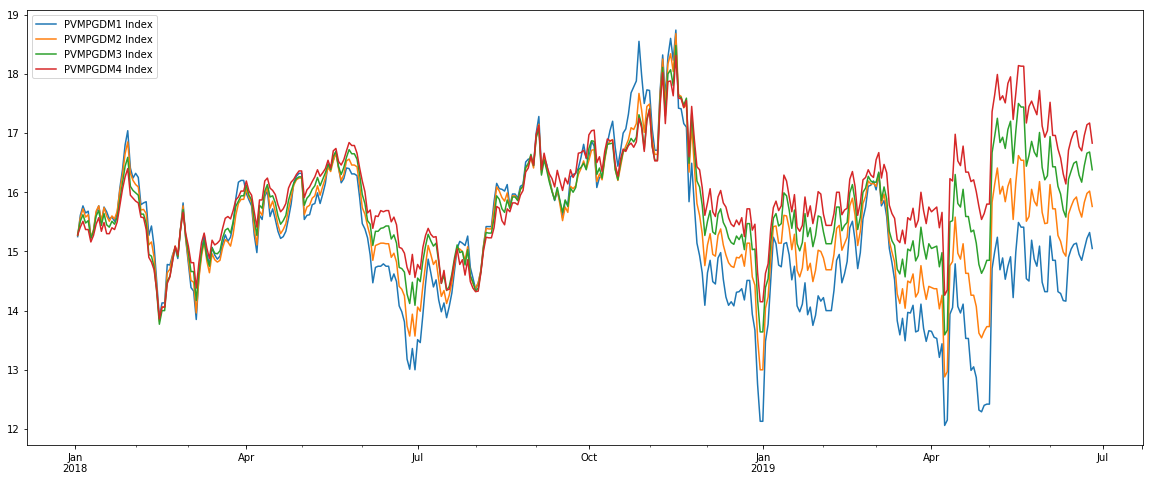

In [5]:
df1.plot(figsize=(20,8),legend=True);

In [6]:
len(df1)

386

In [54]:
#10 Business Day
train = df1.iloc[:376]
test = df1.iloc[376:]

## AR(1) Model

In [55]:
model = AR(train['PVMPGDM1 Index'])
AR1fit = model.fit(maxlag=1,methos='mle')
AR1fit.params

const                0.768365
L1.PVMPGDM1 Index    0.949313
dtype: float64

In [56]:
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [57]:
predictions1

2019-06-12    14.210635
2019-06-13    14.258704
2019-06-14    14.304336
2019-06-17    14.347655
2019-06-18    14.388779
2019-06-19    14.427818
2019-06-20    14.464878
2019-06-21    14.500060
2019-06-24    14.533458
2019-06-25    14.565164
Freq: B, Name: AR(1) Predictions, dtype: float64

In [58]:
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PVMPGDM1 Index'][i]}")

predicted=14.21063517, expected=14.9
predicted=14.2587038 , expected=15.04
predicted=14.30433596, expected=15.12
predicted=14.34765515, expected=15.14
predicted=14.38877862, expected=14.95
predicted=14.42781766, expected=14.85
predicted=14.46487793, expected=15.04
predicted=14.50005971, expected=15.22
predicted=14.53345823, expected=15.32
predicted=14.56516387, expected=15.05


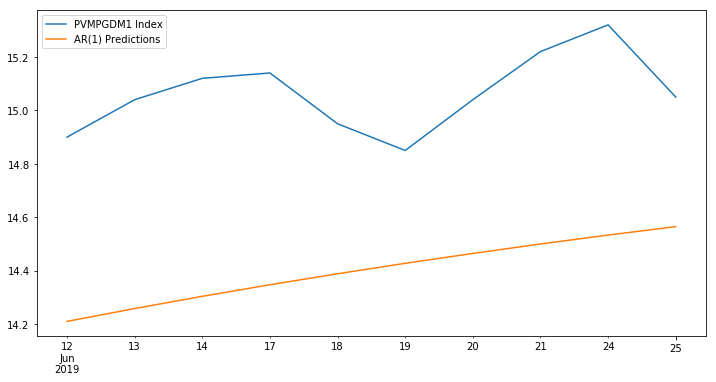

In [59]:
test['PVMPGDM1 Index'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

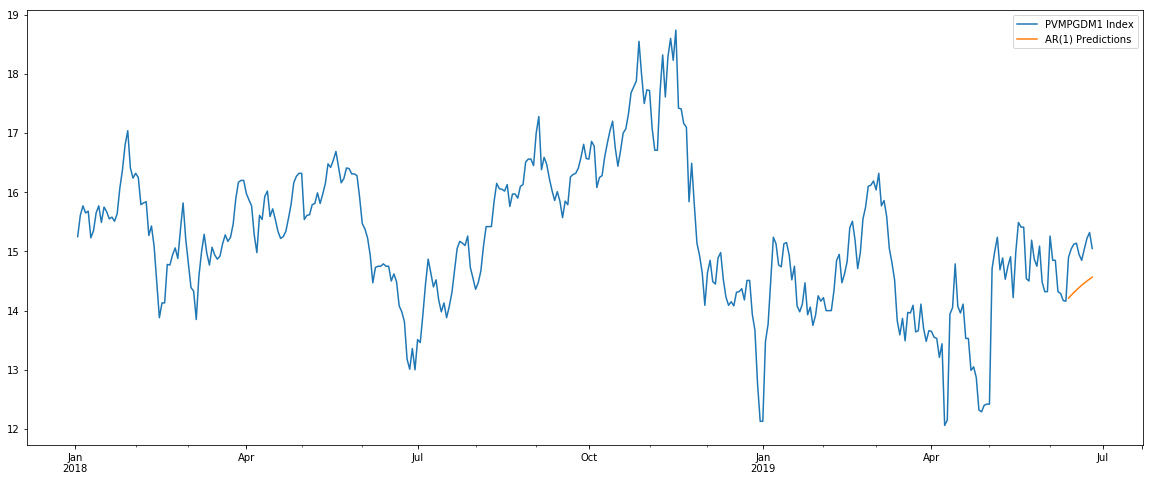

In [60]:
df1['PVMPGDM1 Index'].plot(figsize=(20,8),legend=True)
predictions1.plot(legend=True)

## AR($p$)
let statsmodels determine $p$

In [61]:
model = AR(train['PVMPGDM1 Index'])
ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 17
Coefficients:
const                 0.845532
L1.PVMPGDM1 Index     0.991852
L2.PVMPGDM1 Index    -0.042691
L3.PVMPGDM1 Index     0.015114
L4.PVMPGDM1 Index    -0.035277
L5.PVMPGDM1 Index    -0.046513
L6.PVMPGDM1 Index     0.042963
L7.PVMPGDM1 Index     0.008969
L8.PVMPGDM1 Index    -0.032816
L9.PVMPGDM1 Index     0.056936
L10.PVMPGDM1 Index   -0.069131
L11.PVMPGDM1 Index    0.121523
L12.PVMPGDM1 Index   -0.029059
L13.PVMPGDM1 Index   -0.014803
L14.PVMPGDM1 Index   -0.005644
L15.PVMPGDM1 Index    0.043133
L16.PVMPGDM1 Index   -0.013494
L17.PVMPGDM1 Index   -0.046795
dtype: float64


In [62]:
start = len(train)
end = len(train)+len(test)-1

predictions17 = ARfit.predict(start=start,end=end,dynamic=False).rename('AR(17) predictions')

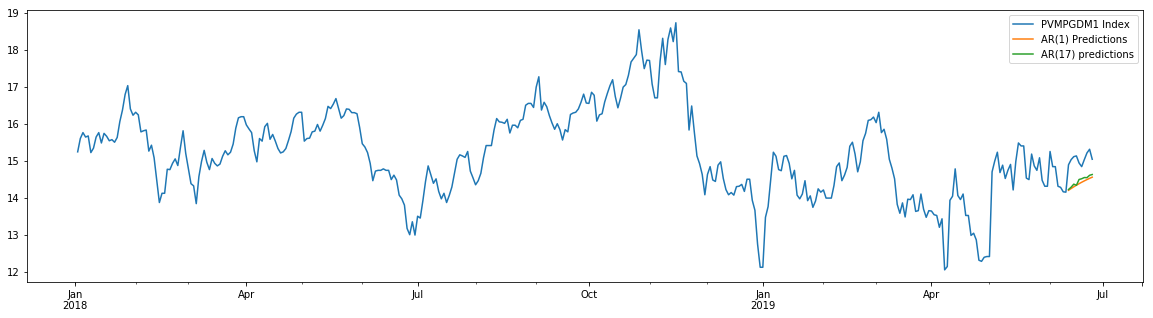

In [63]:
#test['PVMPGDM1 Index'].plot(figsize=(20,5),legend=True)
df1['PVMPGDM1 Index'].plot(figsize=(20,5),legend=True)
predictions1.plot(legend=True)
predictions17.plot(legend=True)

Able to predicted trend but not spike

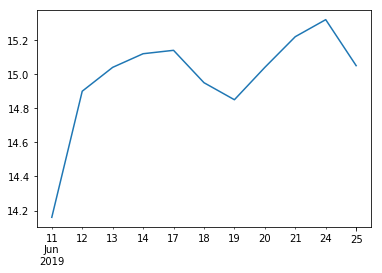

In [64]:
df1['PVMPGDM1 Index'].iloc[375:].plot()

### Evaluate the Model

In [68]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(17)']
preds = [predictions1, predictions17]  # these are variables, not strings!

for i in range(2):
    error = mean_squared_error(test['PVMPGDM1 Index'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 0.4574766615
AR(17) Error: 0.3838413639


In [70]:
modls = [AR1fit,ARfit]

for i in range(2):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: -1.8962
AR(17) AIC: -1.8435


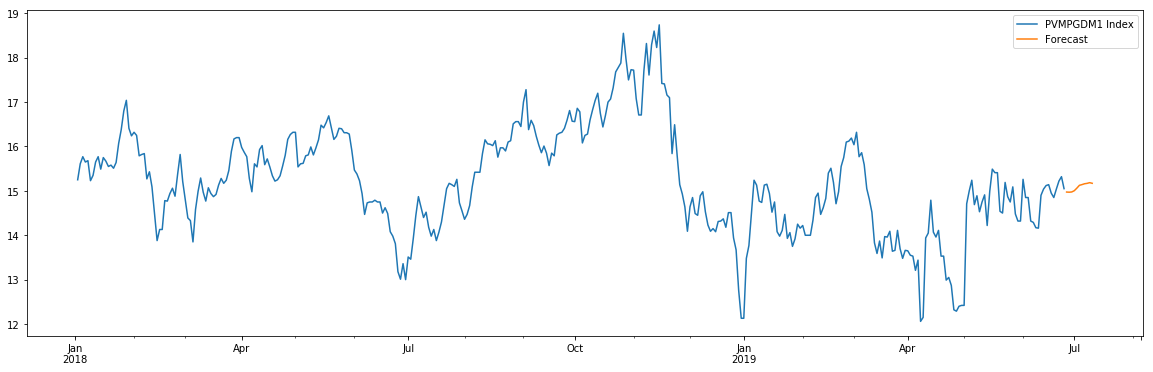

In [71]:
# First, retrain the model on the full dataset
model = AR(df1['PVMPGDM1 Index'])

# Next, fit the model
ARfit = model.fit(maxlag=17,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+10, dynamic=False).rename('Forecast')

# Plot the results
df1['PVMPGDM1 Index'].plot(legend=True)
fcast.plot(legend=True,figsize=(20,6));